In [20]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


## House price prediction using linear regression (multiple features)

Load the house price dataset and also create a copy

In [11]:
dataset = pd.read_csv("./datasets/Housing.csv")
print(dataset.shape)
dset_copy = dataset.copy()
print(tabulate(dataset, headers = 'keys', tablefmt="rounded_grid"))

(545, 13)
╭─────┬──────────┬────────┬────────────┬─────────────┬───────────┬────────────┬─────────────┬────────────┬───────────────────┬───────────────────┬───────────┬────────────┬────────────────────╮
│     │    price │   area │   bedrooms │   bathrooms │   stories │ mainroad   │ guestroom   │ basement   │ hotwaterheating   │ airconditioning   │   parking │ prefarea   │ furnishingstatus   │
├─────┼──────────┼────────┼────────────┼─────────────┼───────────┼────────────┼─────────────┼────────────┼───────────────────┼───────────────────┼───────────┼────────────┼────────────────────┤
│   0 │ 13300000 │   7420 │          4 │           2 │         3 │ yes        │ no          │ no         │ no                │ yes               │         2 │ yes        │ furnished          │
├─────┼──────────┼────────┼────────────┼─────────────┼───────────┼────────────┼─────────────┼────────────┼───────────────────┼───────────────────┼───────────┼────────────┼────────────────────┤
│   1 │ 12250000 │   8960

Checking if the dataset has any null values

In [6]:
null_mask = dataset.isnull().any(axis=1)
dset_copy[null_mask]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


The dataset does not have any empty or NaN values

We need to convert all cells that have text into integer values

In [12]:
dset_copy["mainroad"] = dset_copy["mainroad"].apply(lambda x: 1 if x == "yes" else 0)
dset_copy["guestroom"] = dset_copy["guestroom"].apply(lambda x: 1 if x == "yes" else 0)
dset_copy["basement"] = dset_copy["basement"].apply(lambda x: 1 if x == "yes" else 0)
dset_copy["hotwaterheating"] = dset_copy["hotwaterheating"].apply(lambda x: 1 if x == "yes" else 0)
dset_copy["airconditioning"] = dset_copy["airconditioning"].apply(lambda x: 1 if x == "yes" else 0)
dset_copy["prefarea"] = dset_copy["prefarea"].apply(lambda x: 1 if x == "yes" else 0)
dset_copy["furnishingstatus"] = dset_copy["furnishingstatus"].apply(lambda x: 1 if x == "unfurnished" else (2 if x == "semi-furnished" else 3))
print(tabulate(dset_copy, headers = 'keys', tablefmt="rounded_grid"))

╭─────┬─────────────┬────────┬────────────┬─────────────┬───────────┬────────────┬─────────────┬────────────┬───────────────────┬───────────────────┬───────────┬────────────┬────────────────────╮
│     │       price │   area │   bedrooms │   bathrooms │   stories │   mainroad │   guestroom │   basement │   hotwaterheating │   airconditioning │   parking │   prefarea │   furnishingstatus │
├─────┼─────────────┼────────┼────────────┼─────────────┼───────────┼────────────┼─────────────┼────────────┼───────────────────┼───────────────────┼───────────┼────────────┼────────────────────┤
│   0 │ 1.33e+07    │   7420 │          4 │           2 │         3 │          1 │           0 │          0 │                 0 │                 1 │         2 │          1 │                  3 │
├─────┼─────────────┼────────┼────────────┼─────────────┼───────────┼────────────┼─────────────┼────────────┼───────────────────┼───────────────────┼───────────┼────────────┼────────────────────┤
│   1 │ 1.225e+07   

Dividing the dataset into X and Y where Y -> Price of the house

In [27]:
X = dset_copy.iloc[:, 1:]
Y = dset_copy.iloc[:, :1]

In [29]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,3
1,8960,4,4,4,1,0,0,0,1,3,0,3
2,9960,3,2,2,1,0,1,0,0,2,1,2
3,7500,4,2,2,1,0,1,0,1,3,1,3
4,7420,4,1,2,1,1,1,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,2
542,3620,2,1,1,1,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,3


Splitting the dataset into training and test set

In [ ]:
X_train, X_Test, Y_Train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2,random_state=0)

Fitting a linear regression model using the training dataset

In [22]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_Train)

LinearRegression()

Using the test set to predict the house prices and then calculate mean absolute error and mean squared error

(545,)
Mean Absolute Error = 716583.439661547
Mean Squared Error = 986041803890.0271


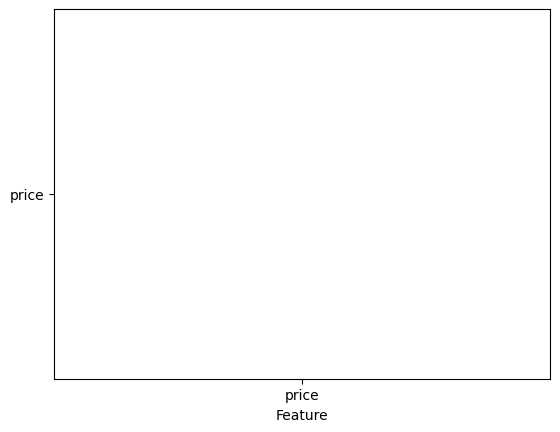

In [43]:
Y_pred = lr_model.predict(X_Test)

print(X["area"].shape)
plt.scatter(Y_test, Y_pred, color = 'blue', label = 'datapoints')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.xlabel("Feature")

print(f"Mean Absolute Error = { mean_absolute_error(Y_test, Y_pred) }")
print(f"Mean Squared Error = { mean_squared_error(Y_test, Y_pred) }")